In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis import distances
import numpy as np

/user/work/fh22600/miniforge3/envs/mda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/user/work/fh22600/miniforge3/envs/mda/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [ ]:
filepath = "/user/work/fh22600/1A5_Sim"

In [3]:
times = [50, 60, 70, 75, 80, 90, 100, 110, 120, 125, 130, 140, 150, 160, 170, 175, 180, 190, 200,210, 220, 225, 230, 240, 250, 260, 270, 275, 280, 290, 300,310, 320, 325, 330, 340, 350, 360,370, 375, 380, 390, 400, 410, 420, 425, 430, 440, 450, 460, 470, 475, 480, 490,500 ]


In [28]:
runs = range(1,11) ## 1 to 10 
#times = [50, 60, 70, 75, 80, 90, 100, 110, 120, 125, 130, 140, 150, 160, 170, 175, 180, 190, 200,210, 220, 225, 230, 240, 250, 260, 270, 275, 280, 290, 300,310, 320, 325, 330, 340, 350, 360,370, 375, 380, 390, 400, 410, 420, 425, 430, 440, 450, 460, 470, 475, 480, 490,500 ]

time_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150]
average_changes = []
with open('distances_output.txt', 'w') as f:
    f.write("NETime(ps)\tMD_run\tEstarttime(ns)\tE_Distance(Å)\tNE_Distance(Å)\tChange(Å)\n")
    
    for tp in time_points:
        e_dists = []
        ne_dists = []
        dist_changes = []
        for run in runs:
            for time in times:
            
                ref = mda.Universe(f'{filepath}/Repeat_{run}/ns_{time}/equil/md{time}_{tp}.pdb') 
                other = mda.Universe(f'{filepath}/Repeat_{run}/ns_{time}/md{time}_{tp}.pdb')
                
                align.alignto(other, ref, select='name CA')
                ## just need to calculate loop distance for non equilibrium
                neloopatom1 = other.select_atoms('(resid 57) and (name CA)')
                neloopatom2 = other.select_atoms('(resid 187) and (name CA)')
                
                resids1, resids2, ne_dist = distances.dist(neloopatom1, neloopatom2, offset=0)

                eloopatom1 = ref.select_atoms('(resid 57) and (name CA)')
                eloopatom2 = ref.select_atoms('(resid 187) and (name CA)')
                
                resids1, resids2, e_dist = distances.dist(eloopatom1, eloopatom2, offset=0)

                e_dists.append(e_dist[0])
                ne_dists.append(ne_dist[0])
                dist_change = ne_dist[0] - e_dist[0]
                #avg_distance = np.mean(dist)
                dist_changes.append(dist_change)
                #print(dist_change)
        #overall_avg_distance = np.mean(loopdistances)
        #f.write(f"{tp}\t{overall_avg_distance:.3f}\n")

                f.write(f"{tp}ns\t{run}\t{time}\t{np.mean(e_dist):.3f}\t{np.mean(ne_dist):.3f}\t{np.mean(dist_change):.3f}\n") 

        timepoint_avg = np.mean(dist_changes) if dist_changes else 0.0   

        f.write(f"{tp}ns\tAverage\tAverage\t{np.mean(e_dists):.3f}\t{np.mean(ne_dists):.3f}\t{timepoint_avg:.3f}\n")
        average_changes.append(timepoint_avg)          

In [4]:
time_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
time_points = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
all_df = pd.read_csv("/user/work/fh22600/1A5_Sim/distances_output.txt", sep='\t')

In [11]:
all_df

,NETime(ps),MD_run,Estarttime(ns),E_Distance(Å),NE_Distance(Å),Change(Å)
0,0ns,1,50,9.710,9.710,0.000
1,0ns,1,60,10.908,10.908,0.000
2,0ns,1,70,9.823,9.823,0.000
3,0ns,1,75,8.659,8.659,0.000
4,0ns,1,80,11.436,11.436,0.000
...,...,...,...,...,...,...
8811,150ns,10,475,14.235,13.729,-0.506
8812,150ns,10,480,16.379,13.464,-2.916
8813,150ns,10,490,16.359,15.574,-0.786
8814,150ns,10,500,12.454,16.554,4.099


In [12]:
averages_df = all_df[all_df["MD_run"] == "Average"]

In [13]:

averages_df

,NETime(ps),MD_run,Estarttime(ns),E_Distance(Å),NE_Distance(Å),Change(Å)
550,0ns,Average,Average,14.767,14.767,0.000
1101,10ns,Average,Average,14.798,14.753,-0.044
1652,20ns,Average,Average,14.824,14.702,-0.122
2203,30ns,Average,Average,14.823,14.688,-0.135
2754,40ns,Average,Average,14.768,14.682,-0.086
3305,50ns,Average,Average,14.765,14.659,-0.106
3856,60ns,Average,Average,14.714,14.640,-0.074
4407,70ns,Average,Average,14.780,14.644,-0.136
4958,80ns,Average,Average,14.788,14.669,-0.119
5509,90ns,Average,Average,14.797,14.699,-0.099


In [14]:
averages_df=averages_df[:11]

In [22]:
averages_df

,NETime(ps),MD_run,Estarttime(ns),E_Distance(Å),NE_Distance(Å),Change(Å)
550,0ns,Average,Average,14.767,14.767,0.000
1101,10ns,Average,Average,14.798,14.753,-0.044
1652,20ns,Average,Average,14.824,14.702,-0.122
2203,30ns,Average,Average,14.823,14.688,-0.135
2754,40ns,Average,Average,14.768,14.682,-0.086
3305,50ns,Average,Average,14.765,14.659,-0.106
3856,60ns,Average,Average,14.714,14.640,-0.074
4407,70ns,Average,Average,14.780,14.644,-0.136
4958,80ns,Average,Average,14.788,14.669,-0.119
5509,90ns,Average,Average,14.797,14.699,-0.099


In [23]:
ne_error = [] 
e_error = []
for i, tp in enumerate(time_points):
    time = str(tp)+"ns"
    df = all_df[(all_df["NETime(ps)"] == time) & (all_df['MD_run'] != "Average")]
    average = df['Change(Å)'].mean()
    ne_sd = df['NE_Distance(Å)'].std()
    ne_se = ne_sd/(np.sqrt(len(df)))
    ne_error.append(ne_se)

    e_sd = df['E_Distance(Å)'].std()
    e_se = e_sd/(np.sqrt(len(df)))
    e_error.append(e_se)


/tmp/ipykernel_3406564/542285438.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


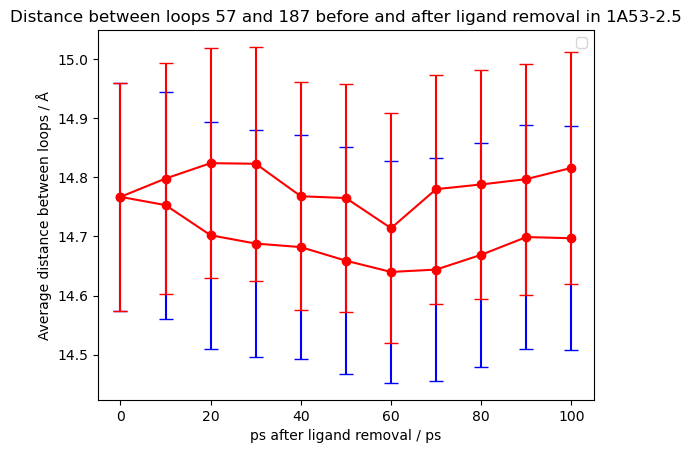

In [24]:
plt.errorbar(time_points, averages_df['NE_Distance(Å)'], color='red',yerr=ne_error, fmt='-o', ecolor='blue',capsize=5)
plt.errorbar(time_points, averages_df['E_Distance(Å)'], color='red',yerr=e_error, fmt='-o', ecolor='red',capsize=5)

plt.ylabel('Average distance between loops / Å')
plt.xlabel('ps after ligand removal / ps')
plt.title('Distance between loops 57 and 187 before and after ligand removal in 1A53-2.5')
plt.legend()